In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib widget
import pyobs

<font size="3">
    
# Lecture 2

## Derived quantities

$\def\O{\mathcal O}$
$\def\Obar{\overline \O}$
$\def\tauexp{\tau_\mathrm{exp}}$
$\def\dObar{\delta \Obar}$
$\def\cov{\mathrm{cov}}$
$\def\fbar{\overline f}$

We are rarely interested in the value of correlation functions: physical information is extracted by the application of functions to these primary observables.

Let us imagine to have several observables estimated by $\O_\alpha(i)$ with $\alpha=1,N_\alpha$. We know what to do for their central values and errors. Their covariance and autocorrelation functions are defined according to
\begin{equation}
    \Gamma_{\alpha\beta}(t) = \langle \delta \O_\alpha(t) \delta \O_\beta(0) \rangle \,, \quad
    \cov(\Obar_\alpha, \Obar_\beta) = \langle [\Obar_\alpha - \langle \O_\alpha \rangle ] [ \Obar_\beta - \langle \O_\beta \rangle ] \rangle
\end{equation}

What if we are interested in the function $F$ evaluated at $\langle \O_\alpha \rangle$, i.e. $f = F(\langle \O_\alpha \rangle)$?

Let us introduce the notation
\begin{equation}
    f_\alpha = \frac{\partial F}{\partial \O_\alpha} \Big|_{\langle \O_\alpha \rangle} \,, \quad
    \fbar_\alpha = \frac{\partial F}{\partial \O_\alpha} \Big|_{\Obar_\alpha} \,.
\end{equation}

We may be tempted to calculate 

\begin{equation}
    f(i) = F(\O_\alpha(i))
\end{equation}

and then proceed to the mean, which we Taylor expand around $F(\langle \O_\alpha \rangle)$

\begin{align}
    \fbar^{(1)} = & \frac1N \sum_i f(i) = f + f_\alpha \frac1N \sum_i  \delta \O_\alpha(i)  + \frac12 \frac1N \sum_i f_{\alpha\beta} \  \delta \O_\alpha(i) \ \delta\O_\beta(i) + O(1/N^3)
\end{align}

By taking the expectation value the second term vanishes and we obtain
\begin{equation}
    \langle \fbar^{(1)} \rangle = f + \frac12 f_{\alpha\beta} \Gamma_{\alpha\beta}(0) + O(1/N)
\end{equation}

However we can also consider $F$ evaluated once at $\Obar_\alpha$; if we Taylor expand it we find

\begin{equation}
    \fbar = F(\Obar_\alpha) = f + f_\alpha \frac1N \sum_i \delta \O_\alpha(i)   
        + \frac12 f_{\alpha\beta}  \frac{1}{N^2} \sum_{i,j} \delta \O_\alpha(i) \ \delta\O_\beta(j) + O(1/N^3)
\end{equation}

where we used $\Obar_\alpha - \langle \O_\alpha \rangle = \frac1N \sum_i \delta \O_\alpha(i)$; from the result above we see that the leading bias has an additional suppression, since

\begin{equation}
    \langle \fbar \rangle = f + \frac12 f_{\alpha\beta} \ \cov(\Obar_\alpha, \Obar_\beta) + O(1/N^2)
\end{equation}


In absence of autocorrelations, namely $\cov(\Obar_\alpha, \Obar_\beta) = \Gamma_{\alpha\beta}(0)/N$, the bias may be cancelled by considering the combination

\begin{equation}
    \frac{N \fbar - \fbar^{(1)}}{N-1} \to F(\langle O_\alpha \rangle) + O(1/N^2)
\end{equation}

It is therefore particularly convenient to apply the formula above to cases where multiple independent replicas are available and where $\fbar$ denotes the evaluation of $F$ on all measurements on all repliacas, while $\fbar^{(1)}$ denotes the average of the evaluations of $F$ over each individual repliace average.
    
    
## Error of $\fbar$

To evaluate the error of $\fbar$ we start from the usual covariance formula
\begin{equation}
    \cov(\fbar) = \langle [\fbar - f]^2 \rangle = \langle \Big[f_\alpha \dfrac1N \sum_i \delta \O_\alpha(i) + \dots \Big]^2 \rangle = f_\alpha f_\beta \frac{1}{N^2} \sum_{i,j} \langle \delta \O_\alpha(i) \ \delta \O_\beta(j) \rangle + O(1/N^2)
\end{equation}

Here we recognize the autocorrelation function $\Gamma_{\alpha\beta}$, but we can also introduce an autocorrelation function for $\fbar$ itself

\begin{equation}
    \cov(\fbar) = f_\alpha f_\beta \frac{1}{N} \sum_t \Gamma_{\alpha\beta}(t) + \dots = \frac{1}{N} \sum_t \Gamma_f(t) + \dots 
\end{equation}

\begin{equation}
    \Gamma_f(t) \equiv f_\alpha f_\beta \Gamma_{\alpha\beta}(t)
\end{equation}

When we estimate the covariance from the data we replace $\Gamma$ with $\overline \Gamma$, and all previous considerations are the same. In particular it is worth noticing that the error of the error is of the same size of the higher-order derivatives that we neglected, making it a general safe assumption.
    
    
## Combining different datasets/ensembles

When we study derived observables, we might end up combining observables calculated either on the same ensemble, but different configurations (or same master field but different source locations) or on totally different ensembles, with different algorithms or different physics.

In all these cases we must be able to propagate our errors.

Error propagation strategy: 

 * defined the union of all available configurations/master-field points

    
 * set $\delta \O_\alpha(i)=0$ if configuration $i$ not available, i.e. not contained in original measurement set

    
 * sum uncorrelated errors from separate ensembles in quadrature

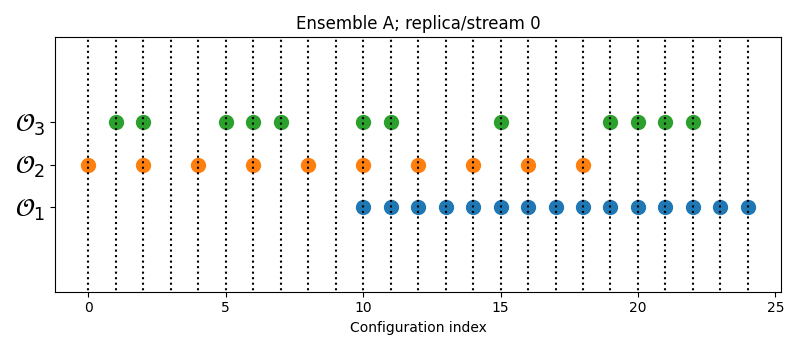

In [2]:
idxA = list(range(10,25))
idxB = list(range(0,20,2))
idxC = np.unique(np.random.choice(range(0,25),20))

plt.figure(figsize=(8,3.5))
for i, _idx in zip([0,1,2],[idxA,idxB,idxC]):
    plt.plot(_idx, [i*0.2]*len(_idx), '.', color=f'C{i}', markersize=20)
    
plt.title('Ensemble A; replica/stream 0')
plt.yticks([0,0.2,0.4],['$\mathcal{O}_1$','$\mathcal{O}_2$','$\mathcal{O}_3$'],fontsize=18)
plt.xlabel('Configuration index')

for i in range(25):
    plt.plot([i,i],[-1,2],':k')
plt.ylim(-0.4,0.8)
plt.tight_layout()

<font size="3">
    

# Exercise: basic derived quantities

We have computed two quantities, the pion mass $a m_\pi$ and the flow scale $t_0/a^2$.
    
We want to combine them to form a dimensionless combination $\phi = (am)^2 t_0/a^2$.
    
*Case 1)* both observables known on all available configurations
    
*Case 2)* they are measured on different ensembles
    
*Case 3)* same ensemble but one observable measured only every other config

Random generator initialized with seed = 2861754801 [Mattia Bruno]


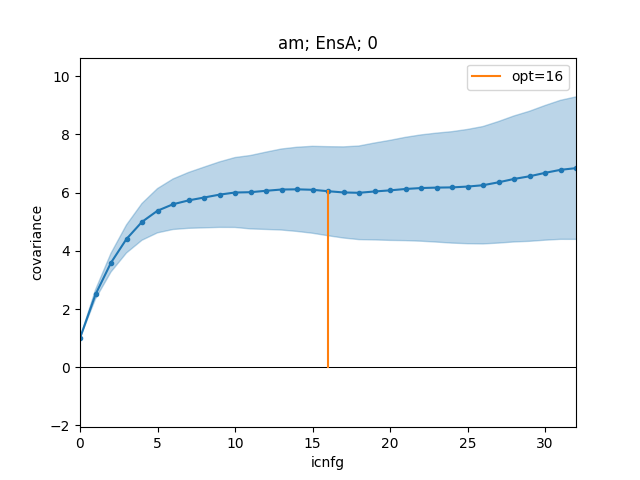

[array([0.29983049]), array([0.00246612])]


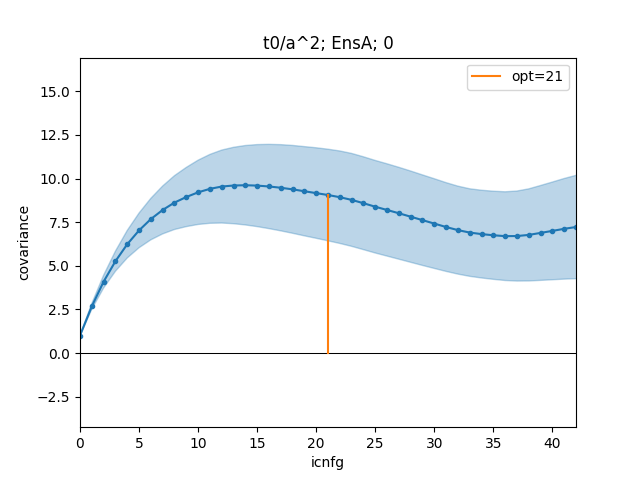

[array([9.98439981]), array([0.09675189])]

 ----> phi = 0.898(22)




In [3]:
N = 1000 
mu = [0.30, 10.0]
cov = [[0.00001, 0.0003],[0.0003, 0.02]]

# autocorrelation time
tau = 8.0

rng = pyobs.random.generator('Mattia Bruno')
data = rng.markov_chain(mu,cov,[3.0, 8.0],N,[[0.08,0.02],[0.2,0.8]])

m = pyobs.observable(description='am')
m.create('EnsA', data[:,0].flatten())
print(m.error(plot=True))

t0 = pyobs.observable(description='t0/a^2')
t0.create('EnsA', data[:,1].flatten())
print(t0.error(plot=True))

print(f'\n ----> phi = {t0 * m**2}\n')

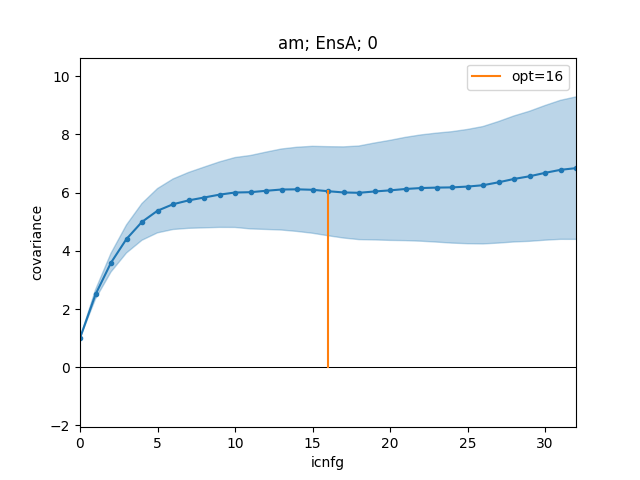

[array([0.29983049]), array([0.00246612])]


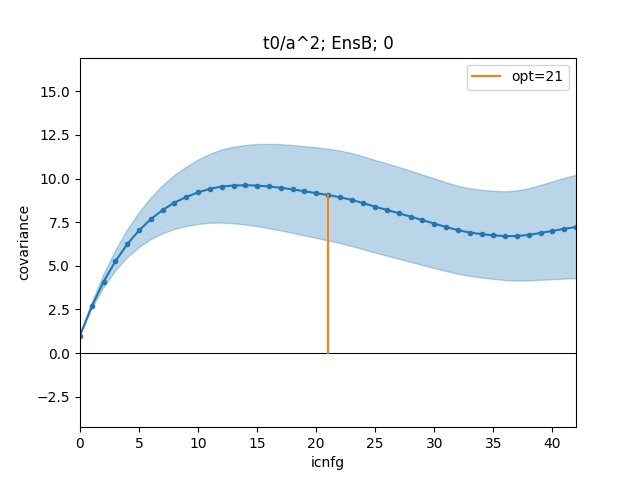

[array([9.98439981]), array([0.09675189])]

 ----> phi = 0.898(17)




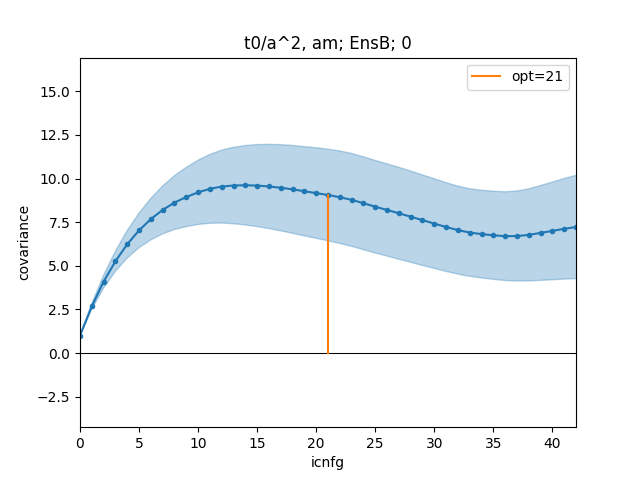

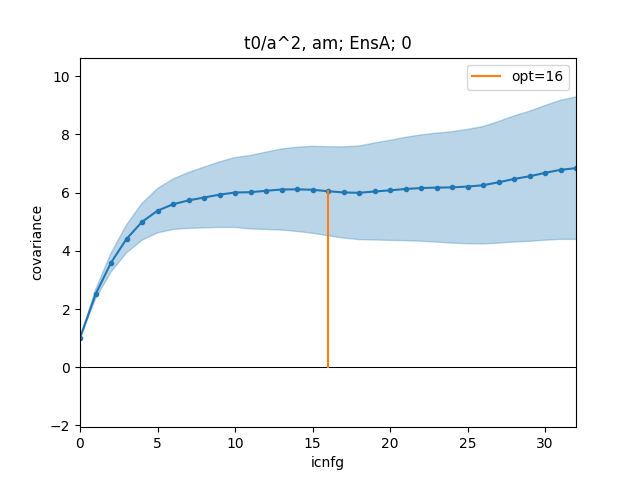

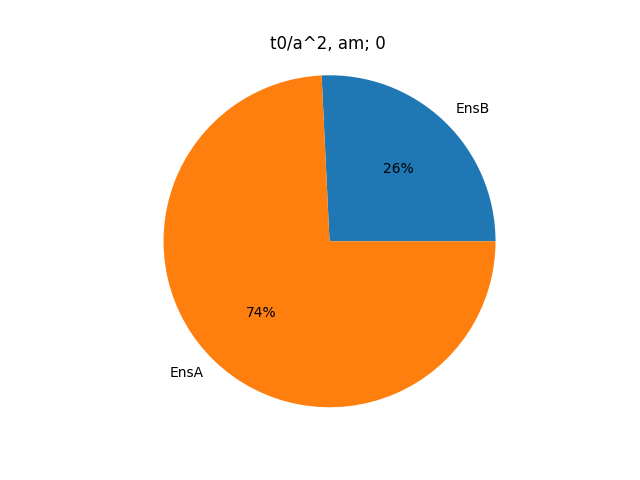

[array([0.8975808]), array([0.0171367])]

In [4]:
m = pyobs.observable(description='am')
m.create('EnsA', data[:,0].flatten())
print(m.error(plot=True))

t0 = pyobs.observable(description='t0/a^2')
t0.create('EnsB', data[:,1].flatten())
print(t0.error(plot=True))

phi = t0 * m**2
print(f'\n ----> phi = {t0 * m**2}\n')
phi.error(plot=True)

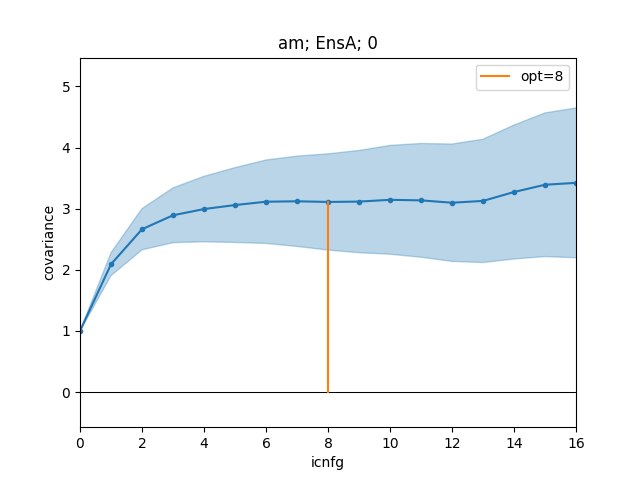

[array([0.29922859]), array([0.00249758])]
Observable with shape = (1,)
 - description: am
 - created by mbruno at macthxbruno.local on Tue Oct 10 16:50:22 2023
 - size: 24 KB
 - mean: [0.29922859]
 - Ensemble EnsA
    - Replica 0 with ncnfg 500
         temporary additional memory required 0.0076 MB

Observable with shape = (1,)
 - description: t0/a^2
 - created by mbruno at macthxbruno.local on Tue Oct 10 16:50:22 2023
 - size: 46 KB
 - mean: [9.98439981]
 - Ensemble EnsA
    - Replica 0 with ncnfg 1000
         temporary additional memory required 0.015 MB

0.894(22)

Observable with shape = (1,)
 - description: t0/a^2, am
 - created by mbruno at macthxbruno.local on Tue Oct 10 16:50:22 2023
 - size: 46 KB
 - mean: [0.8939807]
 - Ensemble EnsA
    - Replica 0 with ncnfg 1000
         temporary additional memory required 0.015 MB



In [5]:
m = pyobs.observable(description='am')
m.create('EnsA', data[::2,0].flatten(), icnfg=range(500,500+N,2))
print(m.error(plot=True))
m.peek()

t0 = pyobs.observable(description='t0/a^2')
t0.create('EnsA', data[:,1].flatten(), icnfg=range(500,500+N))
t0.peek()

phi = t0 * m**2
print(phi)
phi.peek()

# Exercise: calculate effective mass

Use `pyobs.log` and indexing of oservables

In [6]:
corr = pyobs.load('./pscorr.pyobs')
T = corr.shape[0]
print(T)

[Bison] : Reading file ./pscorr.pyobs
[Bison] : File created by mbruno at macthxbruno.local on Fri Oct  6 23:15:08 2023
[Bison] : Read 0.756943 MB at 136.435 MB/s
94


In [7]:
corr[2:4]

0.068188(22)	0.027248(17)

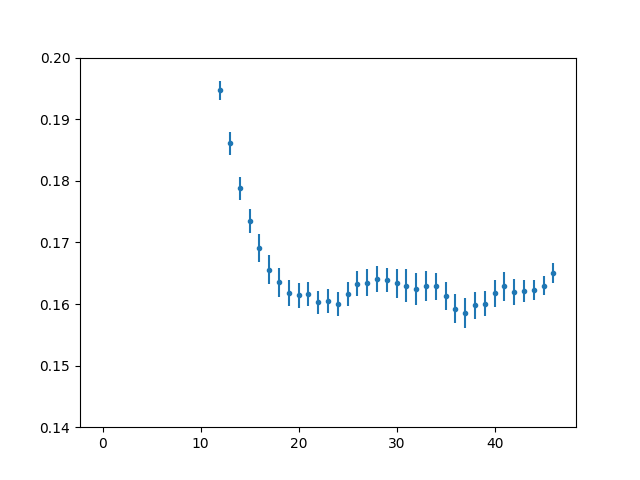

In [8]:
xax = np.arange(T//2)

plt.figure()

meff = pyobs.log(corr[0:T//2]/corr[1:T//2+1])

m, dm = meff.error()
plt.errorbar(xax, m, dm, fmt='.')
plt.ylim(0.14,0.2)

<font size="3">

## Fits

A common way to extract physical information from correlation functions is fitting them with functional forms dictated by our prior theoretical knowledge.

Let us assume to have $N_\alpha$ estimators $\Obar_\alpha$ of $ \O_\alpha$, that we can fit the function $\phi(x, \{ a\})$, with $a_k$ a certain set of free parameters.

The best parameters are obtained from the solution of the least-square problem defined by
    
\begin{equation}
    \chi^2 = \sum_{\alpha, \beta} \big[\Obar_\alpha - \phi(x_\alpha, \{a \})  \big] \ \big[ \cov^{-1} \big]_{\alpha\beta} \ \big[\Obar_\beta - \phi(x_\beta, \{a \})  \big]
\end{equation}

In the case of the effective mass we fit the data with the typical ansatz based on a single exponential. 
    
In the following exercise we perform an uncorrelated fit.

<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in exp
  return a*exp(-b*x) + m
/Users/mbruno/Physics/analysis/pyobs/pyobs/optimize/chisquare.py:75: RuntimeWarning: invalid value encountered in matmul
  return self.e @ self.W @ self.e
/Users/mbruno/Physics/analysis/pyobs/pyobs/optimize/chisquare.py:75: RuntimeWarning: overflow encountered in matmul
  return self.e @ self.W @ self.e


chisquare = 12.499386244644441
chiexp    = 16.501542581245577 +- 3.630062364951773
minimizer iterations = 35
minimizer status: Levenberg-Marquardt: converged 1.0e-06 per-cent tolerance on fun
mfit executed in 0.0417581 secs
Parameters : m, a, b
None


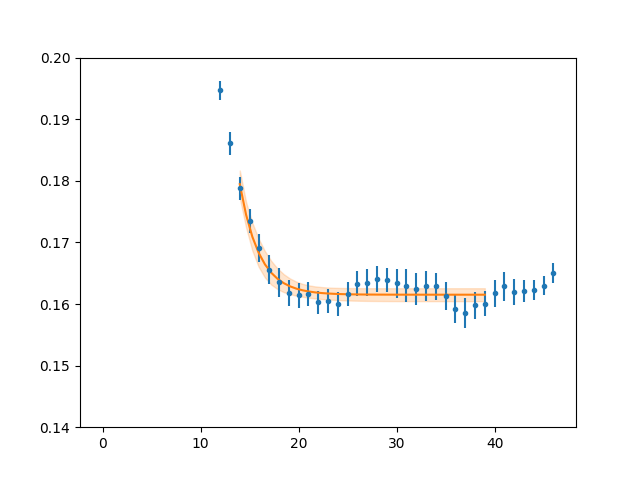

In [9]:
f, df, _ = pyobs.symbolic.diff('m + a * exp(-b * x)', 'x', 'm,a,b')

idx = slice(14,40)

y, dy = meff.error()
W = 1./dy[idx]**2

fit = pyobs.mfit(xax[idx], W, f, df)
pars = fit(meff[idx], p0=[y[-1], 1, 1])
print(fit.parameters())

plt.figure()
plt.errorbar(xax, y, dy, fmt='.')

xe = np.linspace(xax[idx][0], xax[idx][-1], 40)
ye, dye = fit.eval(xe, pars).error()
plt.fill_between(xe, ye+dye, ye-dye, alpha=0.2, color='C1')
plt.plot(xe, ye, '-', color='C1')


plt.ylim(0.14,0.2)

<font size="3">
    
$\def\abar{\overline a}$

In many situations we are forced to consider uncorrelated (or similar) fits because the low statistics, together with large autocorrelations, may prevent us from being able to determine reliably the covariance matrix of all data points involved in the fit.

For a single parameter ($a$) fit we take the general form
\begin{equation}
    \chi^2(a) = \sum_{\alpha, \beta} \big[\Obar_\alpha - \phi(x_\alpha, a)  \big] \ [W^2]_{\alpha\beta} \ \big[\Obar_\beta - \phi(x_\beta, a)  \big]
\end{equation}

The matrix $W$ is taken to be symmetric, positive-definite and in general of $O(N^{1/2})$. A sensible choice is
    
\begin{equation}
    W_{\alpha\beta} = \delta_{\alpha\beta} / \sigma_{\Obar_\alpha}
\end{equation}
    
for uncorrelated fits, or and svd-cutted version of the estimated square-root covariance matrix.
    
So, what is the meaning of $\chi^2$ in all these cases? And of the corresponding p-value?

Let us calculate what is the expected value of the $\chi^2$ in such situations to have a reference for comparison.
We consider a single free parameter: at the minimum its value is denoted by $\abar$. At first we Taylor expand the function $\phi(x,\abar)$ around $\phi(x_\alpha, A) = \O_\alpha$, with $A$ the true value of the parameter,

\begin{equation}
    \phi(x, \abar) = \phi(x, A) + \phi'(x,A) \ \delta \abar + \dots \quad \delta \abar = \abar - A
\end{equation}

Next we consider
\begin{equation}
    \Obar_\alpha - \phi(x_\alpha, \abar) = \delta \Obar_\alpha - \phi'(x,A) \ \delta \abar + \dots
\end{equation}

Let us turn to a simpler matrix-vector notation, introducing $\phi(x_\alpha, a) \to \phi(a)$. The minimum condition reads

\begin{equation}
    0 = \frac{\partial \chi^2(a)}{\partial a} \bigg|_{a=\abar} = \phi'(\abar)^T W^2 \big[\Obar - \phi(\abar)\big]
\end{equation}

By introducing a projector $P$ on the span $\{ W \phi'(\abar) \}$ the above equation is rewritten as

\begin{equation}
    P W [\Obar - \phi(\abar) ] = 0
\end{equation}
    
Note that $(1-P) W \phi'(\abar) = 0$ is also valid. From the central limit theorem we expect the $\Obar_\alpha$ to be distributed around $O_\alpha$ with gaussian distribution and covariance matrix $\cov(\Obar_\alpha, \Obar_\beta)$, i.e.
    
\begin{equation}
    \cov(\Obar_\alpha, \Obar_\beta) = \langle \Delta \Obar_\alpha \Delta \Obar_\beta \rangle \,, \quad \Delta \Obar_\alpha = \Obar_\alpha - \langle \O_\alpha \rangle
\end{equation}

    
Using this result in $\chi^2(\abar)$, together with the expansions above we obtain

\begin{align}
    \chi^2 (\abar) = & [\Obar - \phi(\abar)]^T W^2 [\Obar - \phi(\abar)]  \\ = & [\Obar - \phi(\abar)]^T W [1 - P + P ] W [\Obar - \phi(\abar)] \\ = & [\Obar - \phi(\abar)]^T W [1 - P] W [\Obar - \phi(\abar)]
    \\ = & [\Obar - \phi(\abar)]^T W [1 - P] W [\Delta \Obar - \phi'(\abar) \delta \abar + O(\delta \abar^2)]
    \\ = & \Delta \Obar^T W [1-P] W \Delta \Obar + O(\delta \abar^2)
\end{align}

     
Therefore by taking the expectation value of the expression above we obtain

\begin{equation}
    \langle \chi^2 (\abar) \rangle = \mathrm{Tr} \Big[ (1-P) W \cov W \Big] + O(1/N)
\end{equation}

This is the `chiexp` field that you saw above!
    
Note: you should always rely on the p-value rather than on the $\chi^2_\mathrm{exp}$. See Ref. [Bruno, Sommer]

In [10]:
print(f'chi^2  = {fit.chisquared(pars):.2f}')
print(f'd.o.f. = {len(xax[idx]-len(pars.mean))}')
print(f'chiexp = {pyobs.valerr(*fit.chiexp(meff[idx], pars))}')

chi^2  = 12.50
d.o.f. = 26
chiexp = 16.5(3.6)


## Exercise: understand excited states

Change the fit range and study the variation of the ratio $\chi^2 / \chi^2_\mathrm{exp}$ to judge for which fit range only a single excited states contributes.

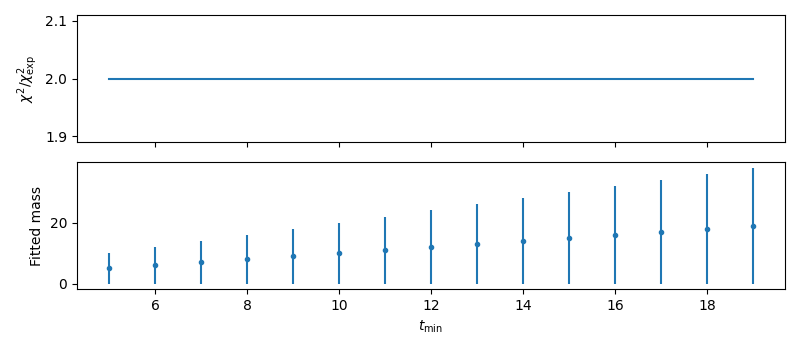

In [11]:
fitted_mass = []
rc = []
tmins = np.arange(5,20)

for tmin in tmins:
    fitted_mass.append(0) # fill this line
    rc.append(2) # fill this line with chi^2/chiexp
    
# uncomment the line below
# fitted_mass = pyobs.tensor_remove(pyobs.stack(fitted_mass))

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3.5), sharex=True)

ax1.plot(tmins, rc)
ax1.set_ylabel('$\chi^2 / \chi^2_\mathrm{exp}$')

ax2.errorbar(tmins, tmins, tmins, fmt='.')
ax2.set_ylabel('Fitted mass')
ax2.set_xlabel('$t_\mathrm{min}$')

f.tight_layout()

## Exercise: fit the correlator with several exponentials

<font size="3">
    
## Combined fits

Here we show how to perform global/combined fits, to many observables measured on several ensembles. For example a chiral and continuum extrapolation.

Our prior knowledge suggests that the quantity $F$ that we are measuring should behave as
\begin{equation}
    F_\pi(a, y) = F \big(1 + y log(y) \big) (1 + c a^2)
\end{equation}
where $F$ and $c$ are free unknown parameters, $a$ is the lattice spacing and $y$ a proxy for the pion mass, such as $y = \frac{m_\pi^2}{4 \pi^2 F_\pi^2}$.

In [12]:
N = [800, 600, 750, 1000, 1000, 970, 600]
y = [0.1,0.07,0.04, 0.02, 0.08, 0.045, 0.03]
a = [0.1, 0.1, 0.1, 0.1, 0.07, 0.07, 0.07]
tau = [  2,   2,   2,   2,   16,   16,   16]
Ny = len(y)

def fpi(y,a2):
    return 2.15*(1 + y*np.log(y))*(1 + 50*a2)

Fpi = []
xax = np.zeros((Ny,2))
for i in range(Ny):
    xax[i,0] = y[i]
    xax[i,1] = a[i]**2  # <----- note that xax is two-dimensional
    
    f = fpi(y[i],a[i]**2)
    data = rng.markov_chain(f,f*0.01,tau[i],N[i])

    Fpi.append(pyobs.observable())
    Fpi[-1].create(f'Ensemble{i}', data)

Fpi = pyobs.remove_tensor(pyobs.stack(Fpi))
asq = np.unique(a)**2

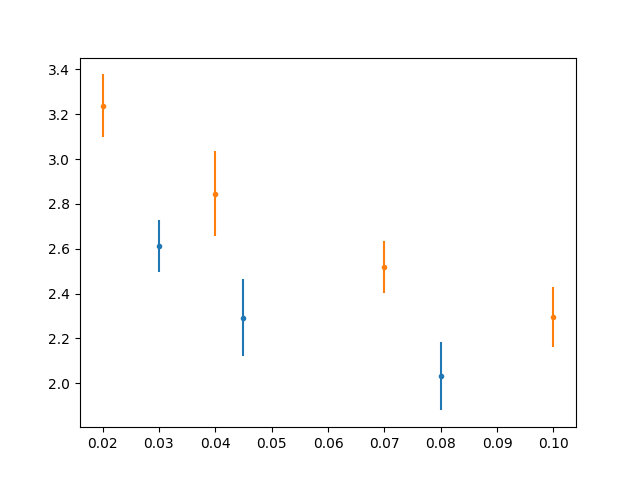

In [13]:
[ff, dff] = Fpi.error()

plt.figure()
for a2 in asq:
    idx = xax[:,1]==a2
    plt.errorbar(xax[idx,0],ff[idx], dff[idx],fmt='.')

In [14]:
[f, df, _] = pyobs.symbolic.diff('F*(1 + y*log(y))*(1 + c*asq)','y, asq','F, c')
W = 1./dff**2
fit = pyobs.mfit(xax, W, f, df, v='y, asq')
pars = fit(Fpi)
fit.parameters()
pars

chisquare = 9.266383065595601
chiexp    = 5.0000000000000036 +- 1.575165851801921
minimizer iterations = 4
minimizer status: Levenberg-Marquardt: reached  1.0e-08 per-cent tolerance on x0
mfit executed in 0.0588179 secs
Parameters : F, c


2.34(20)	37(14)

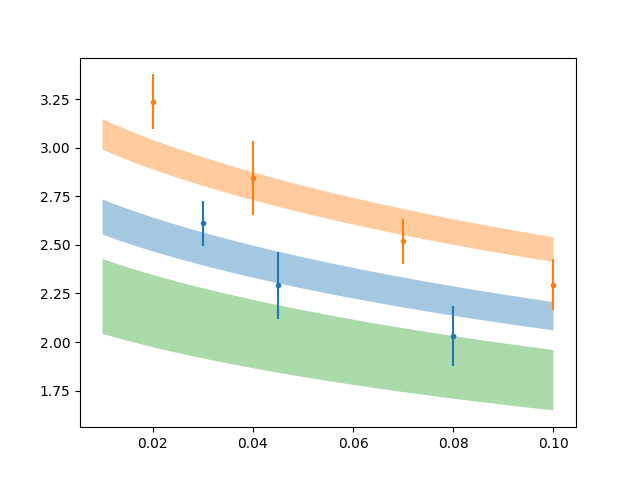

In [15]:
xax2 = np.arange(0.01,max(y),2e-3)

plt.figure()

for a2 in asq:
    idx = xax[:,1]==a2
    plt.errorbar(xax[idx,0],ff[idx], dff[idx],fmt='.')
    
    yax = fit.eval(np.c_[xax2, [a2]*len(xax2)], pars)
    [yy,dyy] = yax.error()
    plt.fill_between(xax2, yy+dyy, yy-dyy, alpha=0.4)
    
yax = fit.eval(np.c_[xax2, [0.0]*len(xax2)], pars)
[yy,dyy] = yax.error()
plt.fill_between(xax2, yy+dyy, yy-dyy, alpha=0.4)

In [16]:
xphys = np.array([[0.01,0.0]])
print('Decay constant at phys mass (y=0.01) = ', fit.eval(xphys,pars))

Decay constant at phys mass (y=0.01) =  2.24(19)



In [17]:
pars.peek()

Observable with shape = (2,)
 - description: unknown
 - created by mbruno at macthxbruno.local on Tue Oct 10 16:50:24 2023
 - size: 344 KB
 - mean: [ 2.34331655 37.25873825]
 - Ensemble Ensemble0
    - Replica 0 with ncnfg 800
         temporary additional memory required 0.012 MB
 - Ensemble Ensemble1
    - Replica 0 with ncnfg 600
         temporary additional memory required 0.0092 MB
 - Ensemble Ensemble2
    - Replica 0 with ncnfg 750
         temporary additional memory required 0.011 MB
 - Ensemble Ensemble3
    - Replica 0 with ncnfg 1000
         temporary additional memory required 0.015 MB
 - Ensemble Ensemble4
    - Replica 0 with ncnfg 1000
         temporary additional memory required 0.015 MB
 - Ensemble Ensemble5
    - Replica 0 with ncnfg 970
         temporary additional memory required 0.015 MB
 - Ensemble Ensemble6
    - Replica 0 with ncnfg 600
         temporary additional memory required 0.0092 MB

